<a href="https://colab.research.google.com/github/hlsvalle/data-science/blob/master/Analisando_dados_violencia_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro

O Rio de Janeiro é a segunda maior cidade do país, com 6,7 milhões de habitantes. 

Um dos pontos da alta da taxa de criminalidade esta associada ao trafico de drogas.

Mas o tráfico, por si só, não justifica o alto índice de criminalidade. Praticamente todas as grandes metrópoles do mundo possuem comércio ilegal de drogas. Estima-se que o mercado consumidor de cocaína em Nova York, por exemplo, seja duas vezes maior que o Rio. A diferença é que nem a cidade americana nem outras europeias testemunham quase que diariamente cenas de guerra nas ruas, como acontece no Rio. Como explicar isso? A resposta é que, no Rio, facções armadas travam lutas pelo controle de territórios, favorecidas por uma rede de corrupção e pelo descaso histórico do poder público em relação às favelas nos morros cariocas.

Ao longo deste trabalho vamos poder tirar algumas conclusões sobre os dados obtidos.


# Obtenção dos Dados

Este trabalho foi possivel através da obtenção de um `dataset` no seguinte endereço do [ISPDADOS](http://www.ispdados.rj.gov.br/estatistica.html).

Este site fornece algumas séries históricas sobre os dados do Estado do Rio de Janeiro.

Com este [`dataset`](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv). esperamos coletar diversar informações como por exemplo quantidade de policiais mortos em serviço, quantidades de homicidio, latrocinio por ano/mês. Ou seja poderemos avaliar alguns dados importantes sobre o Rio de Janeiro.


## Importando os Dados

In [0]:
#Importando as bibliotecas necessarias
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv")

## Análise dos Dados

Abaixo iniciaremos uma verificação sobre os dados coletados, sendo possivel saber o tamanho do dataframe, os nomes das colunas, os tipos das variaveis entre outros.

In [2]:
#Mostrando o tamanho do DataFrame
df.shape

(344, 56)

Observamos acima que o nosso dataframe possui 344 entradas e 56 colunas;

In [3]:
#Mostrando as colunas do DataFrame
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [4]:
#Mostrando os tipos de variaveis
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [5]:
#Visualizando as 5 primeiras linhas do DataFrame
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [11]:
#Identificando a porcentagem de colunas com valores ausentes
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


Acima observamos em ordem decrescente de que informações sobre roubo e furto de bicicletas possuem **80%** de informações ausentes, ou seja, possivelmente no boletim de ocorrência não foi informado;

## Informações estatisticas sobre a Violência no Rio de Janeiro

Vamos analisar algumas informações e comparar as possiveis causas/efeitos sobre os dados coletados;

In [12]:
#Mostrando o resumo estatistico do nosso Dataframe
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

In [13]:
#Mostrando a Média de Roubo de Veiculos
df.roubo_veiculo.mean()

2448.6976744186045

In [14]:
#Mostrando a Média de Furtos de Veiculos
df.furto_veiculos.mean()

1674.671511627907

In [15]:
#Mostrando a Média de Recuperação de Veiculos
df.recuperacao_veiculos.mean()

1772.2383720930231

In [17]:
#Mostrando a porcentagem entre a recuperação de veiculos por roubo e furto de veiculos
df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean()) * 100

42.980346705075085

Observamos acima que **42%** dos carros furtados e roubados são recuperados;

In [22]:
#Mostrando o valor max da coluna hom_doloso
df.hom_doloso.max()

831

In [21]:
#Mostrando o valor min da coluna hom_doloso
df.hom_doloso.min()

272

In [27]:
#Mostrando a média de Policiais Militares Mortos em serviço
df.pol_militares_mortos_serv.mean()

2.085

In [28]:
#Mostrando a média de Policiais Civis Mortos em serviço
df.pol_civis_mortos_serv.mean()

0.34

Fiz duas comparações acima entre policiais civis e militares mortos em serviço, considerando que em um dataframe de 344 linhas, sendo que **41%** dos dados nas colunas pol_civis_mortos_serv e pol_militares_mortos estão ausentes, podemos perceber que morrem mais policiais militares em serviço do que policiais civis;

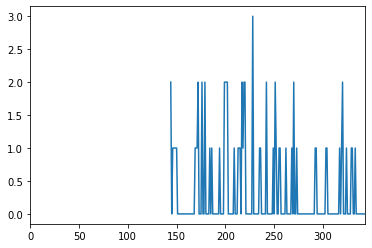

In [30]:
#Plotando os Policiais Civis Mortos em Serviço
df['pol_civis_mortos_serv'].plot();

## Visualização dos dados

Vamos plotar alguns graficos para podermos acompanhar a evolução dos dados coletados.

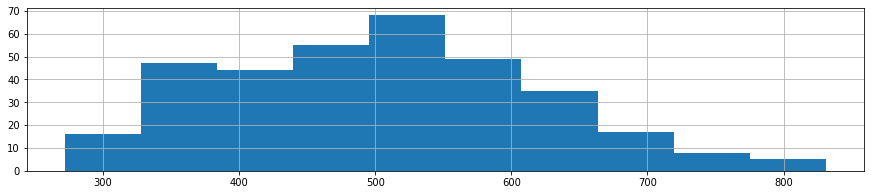

In [24]:
#Plotando o histograma da coluna hom_doloso
df.hom_doloso.hist(figsize=(15,3));

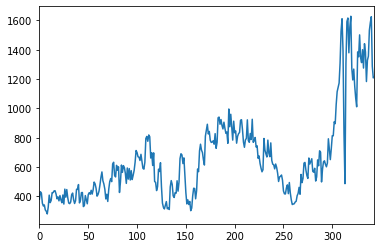

In [26]:
#Plotando um grafico de linhas para roubo_em_coletivo
df.roubo_em_coletivo.plot();

# Conclusões

Com este projeto foi possivel entender mais os conceitos estatisticos, como histograma, resumos estatisticos do dataframe;

É possivel através destas informações realizar um trabalho mais detalhado;

Foi possivel observar a presença de outliers como no caso de homicidios doloso onde se tem 344 casos e a maxima se tem de 831, criando assim uma distorção em nossos dados;

É necessario trabalhar as colunas ausentes onde o roubo e furto de bicicletas apresentaram em torno de **80%** dos valores ausentes;

